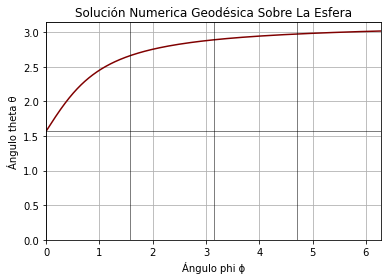

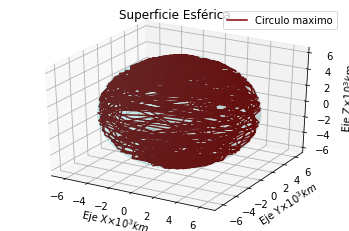

In [2]:
#solucion de la secuaciones Geodésicas utilizando el método de Rungekuta de orden 4
#paquetes necesarios par ala implementación del código
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos,pi,tan
from pylab import *
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
from matplotlib import style
#definición de las funciones 
def fx (y,t):
    ec=(sin(t))*(cos(t))*(y**2)
    return ec

def fy (x,y,t):
    ec=-2*(1/(tan(t)))*x*y
    return ec
           
def ftheta (x):
    ec=x
    return ec
           
def fphi (y):
    ec=y
    return ec

#defidenición de los valores iniciales
n=1000 #int (input(Numero de iteraciones"))         
h=(2*pi)/n #float(input("Tamaño del paso:"))  
x=np.zeros(n)
y=np.zeros(n)
t=np.zeros(n)
p=np.zeros(n)
x[0]=1
y[0]=1
t[0]=pi/2
p[0]=0
#definición de las constantes para el método de rungekuta de nivel 4
#función 1
k11=np.zeros(n)
k12=np.zeros(n)
k13=np.zeros(n)
k14=np.zeros(n)
#función2
k21=np.zeros(n)
k22=np.zeros(n)
k23=np.zeros(n)
k24=np.zeros(n)
#función3
k31=np.zeros(n)
k32=np.zeros(n)
k33=np.zeros(n)
k34=np.zeros(n)
#función3
k41=np.zeros(n)
k42=np.zeros(n)
k43=np.zeros(n)
k44=np.zeros(n)
for i in np.arange(1,n):
    k11[i]=(fx(y[i],t[i]))*h
    k12[i]=(fx(y[i]+(k21[i]/2),t[i]+(k31[i]/2)))*h
    k13[i]=(fx(y[i]+(k22[i]/2),t[i]+(k32[i]/2)))*h
    k14[i]=(fx(y[i]+(k23[i]),t[i]+(k33[i])))*h
    x[i]=x[i-1]+((1/6)*(k11[i]+2*k12[i]+2*k13[i]+k14[i]))
    k21[i]=(fy(x[i-1],y[i-1],t[i-1]))*h
    k22[i]=(fy(x[i-1]+(k11[i]/2),y[i-1]+(k21[i]/2),t[i-1]+(k31[i]/2)))*h
    k23[i]=(fy(x[i-1]+(k12[i]/2),y[i-1]+(k22[i]/2),t[i-1]+(k32[i]/2)))*h
    k24[i]=(fy(x[i-1]+(k13[i]),y[i-1]+(k23[i]),t[i-1]+(k33[i])))*h
    y[i]=y[i-1]+((1/6)*(k21[i]+(2*k22[i])+(2*k23[i])+k24[i]))
    k31[i]=(ftheta(x[i-1]))*h
    k32[i]=(ftheta(x[i-1]+(k31[i]/2)))*h
    k33[i]=(ftheta(x[i-1]+(k32[i]/2)))*h
    k34[i]=(ftheta(x[i-1]+(k33[i])))*h
    t[i]=t[i-1]+((1/6)*(k31[i]+(2*k32[i])+(2*k33[i])+k34[i]))
    k41[i]=(fphi(y[i-1]))*h
    k42[i]=(fphi(y[i-1]+(k41[i]/2)))*h
    k43[i]=(fphi(y[i-1]+(k42[i]/2)))*h
    k43[i]=(fphi(y[i-1]+(k43[i])))*h
    p[i]=p[i-1]+((1/6)*(k41[i]+(2*k42[i])+(2*k43[i])+k44[i]))
#Función para graficar el circulo maximo.
A = np.zeros(n)
B = np.zeros(n)
C = np.zeros(n)
A[0]=6.3*sin(t[0])*cos(p[0])
B[0]=6.3*sin(t[0])*sin(p[0])
C[0]=6.3*cos(t[0])
for i in np.arange(1,n):
    A[i]=6.3*sin(t[i])*cos(p[i])
    B[i]=6.3*sin(t[i])*sin(p[i])
    C[i]=6.3*cos(t[i])
    
plt.plot(p,t,linewidth=1.5,color=(0.5019607843137255,0,0,1))
#Nombre para los ejes
plt.xlabel('Ángulo phi ϕ')
plt.ylabel('Ángulo theta θ')
# Limitar los valores de los ejes.
plt.xlim(0, 2*pi)
plt.ylim(0, pi)
#Nombre para la grafica
plt.title('Solución Numerica Geodésica Sobre La Esfera')
# Establecer el color de los ejes.
plt.axhline(0, linewidth=0.5, color="black")
plt.axhline(pi/2, linewidth=0.5, color="black")
plt.axhline(pi, linewidth=0.5, color="black")
plt.axhline(3*pi/2, linewidth=0.5, color="black")
plt.axvline(0, linewidth=0.5, color="black")
plt.axvline(pi/2, linewidth=0.5, color="black")
plt.axvline(pi, linewidth=0.5, color="black")
plt.axvline(3*pi/2, linewidth=0.5, color="black")
#malla
plt.grid()
#Guardar gráfico como imágen PNG.
plt.savefig("Grafica geodesica solución rugekutta4.png")
#grafica en 3d
#leyenda
mpl.rcParams['legend.fontsize'] = 10
#Area de trabajo
fig = plt.figure()
ax = fig.gca(projection='3d')
#Grafica en 3d
#Grafica de la esfera
def sphere(r):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    d = r * np.outer(np.cos(u), np.sin(v))
    e = r * np.outer(np.sin(u), np.sin(v))
    f = r * np.outer(np.ones(np.size(u)), np.cos(v))
    return d,e,f
d,e,f = sphere(6.371)
ax.plot_surface(d, e, f, rstride=3, cstride=3, color=(0,0.8,0.8,0.1))
ax.plot(A,B,C,linewidth=1.5,color=(0.5019607843137255,0,0,1), label='Circulo maximo')
ax.legend()
#Nombre de los ejes
ax.set_xlabel('Eje X'r'$\times 10^{3}km$')
ax.set_ylabel('Eje Y'r'$\times 10^{3}km$')
ax.set_zlabel('Eje Z'r'$\times 10^{3}km$')
#Titulo para la grafica
ax.set_title('Superficie Esférica')
# Guardar gráfico como imágen PNG.
plt.savefig("Circulo máximo solución rugekutta4.png")
plt.show()
